# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# 2. Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


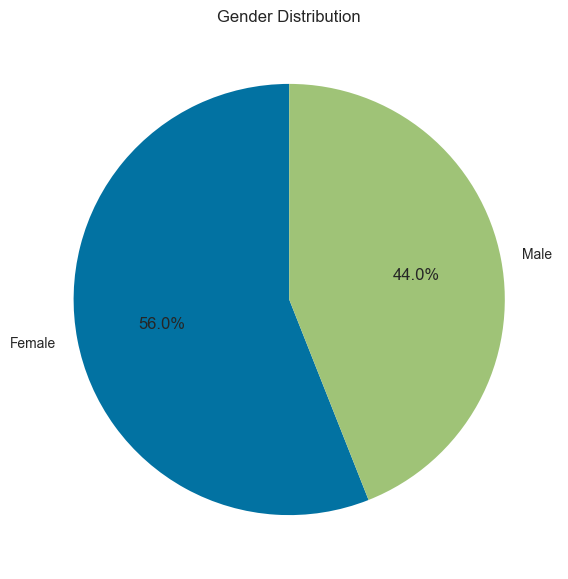

In [5]:
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(),
        labels=['Female', 'Male'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Gender Distribution')
plt.show()

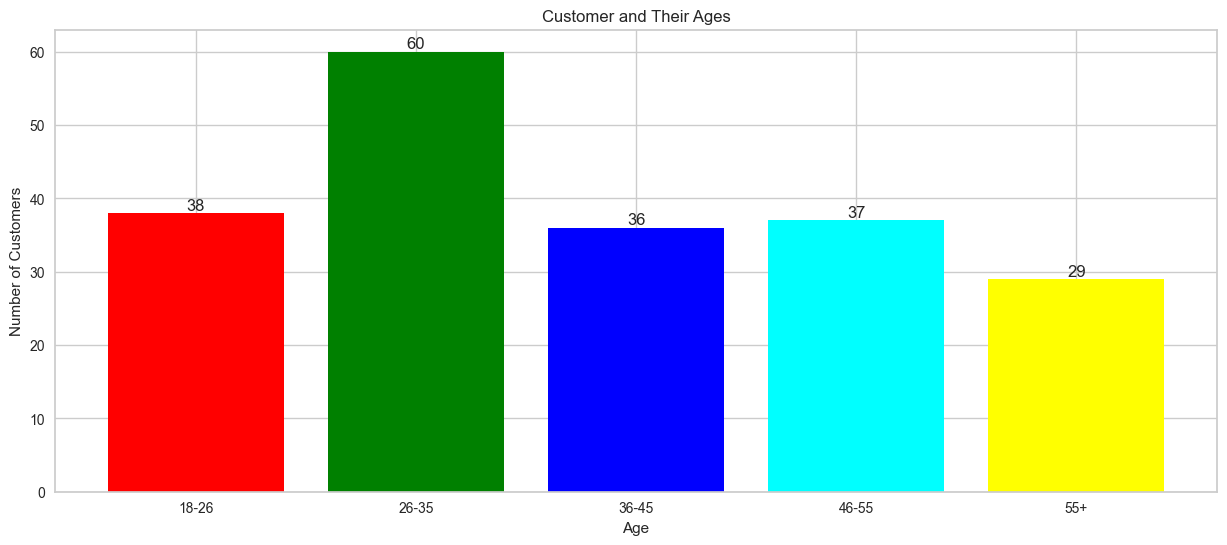

In [6]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[(df.Age > 55)]


x = ["18-26", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color = ['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

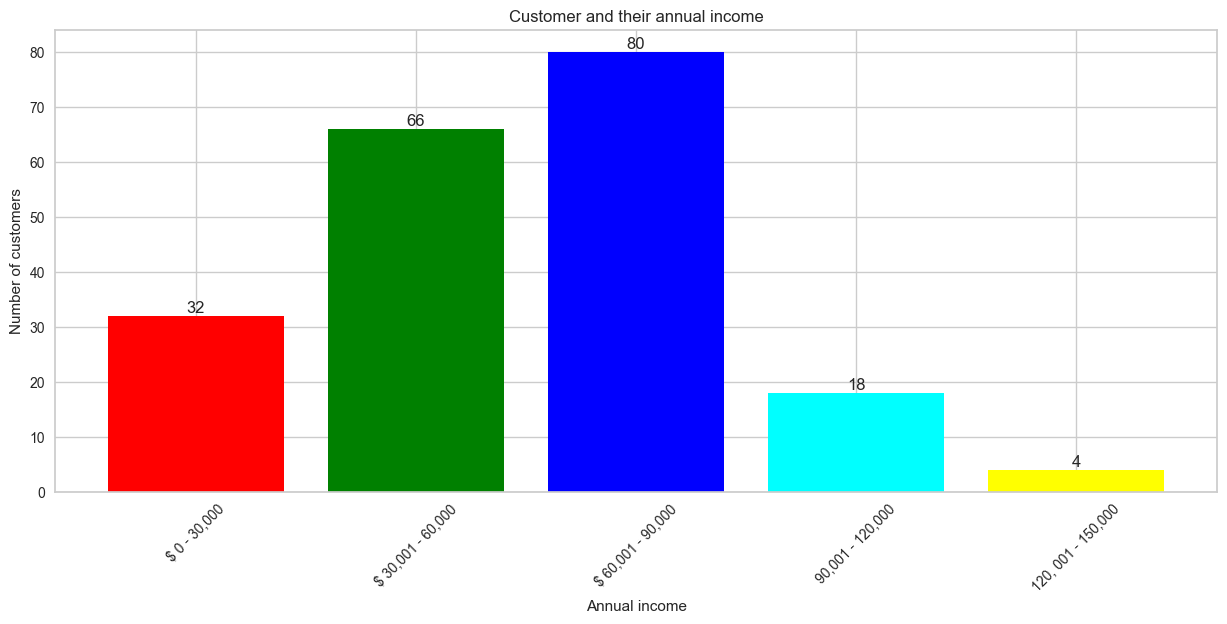

In [13]:
aio_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
aio_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
aio_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
aio_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
aio_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "90,001 - 120,000", "120, 001 - 150,000"]
aiy = [len(aio_30.values), len(aio_60.values), len(aio_90.values), len(aio_120.values), len(aio_150.values)]

plt.figure(figsize=(15,6))
plt.bar(aix, aiy, color=["red", "green", "blue", "cyan", "yellow"])
plt.title("Customer and their annual income")
plt.xlabel("Annual income")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)

for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

In [15]:
X = df.iloc[:, [3, 4]].values

pd.DataFrame(X, columns=["Annual Income (k$)", "Spending Score (1-100)"])

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


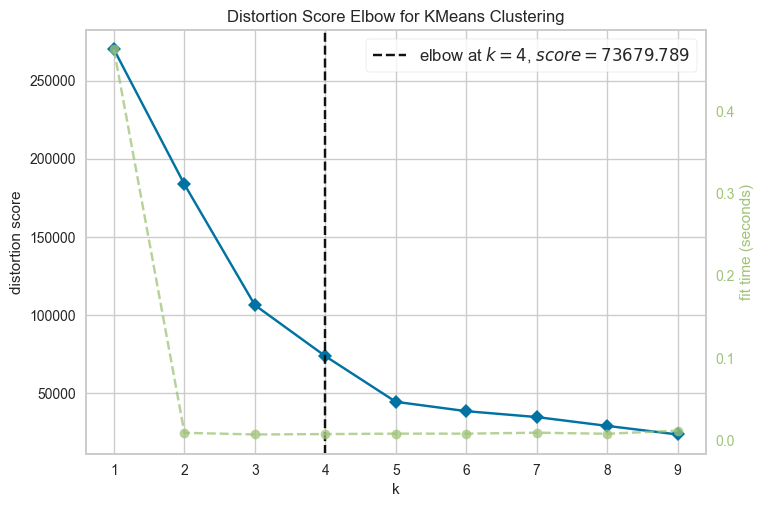

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
kmeans = KMeans()
visualizer  = KElbowVisualizer(kmeans, k=(1,10))

visualizer.fit(X)

visualizer.show()

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

k = 4

def analyze_clusters(X, labels, k):
    print("Analisis Karakter setiap cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata annual income (k$): {mean_income:.2f}")
        print(f"Rata-rata spending score (1-100): {mean_spending}")

analyze_clusters(X, labels, k)

Analisis Karakter setiap cluster:

Cluster 1:
Rata-rata annual income (k$): 48.26
Rata-rata spending score (1-100): 56.48

Cluster 2:
Rata-rata annual income (k$): 86.54
Rata-rata spending score (1-100): 82.12820512820512

Cluster 3:
Rata-rata annual income (k$): 87.00
Rata-rata spending score (1-100): 18.63157894736842

Cluster 4:
Rata-rata annual income (k$): 26.30
Rata-rata spending score (1-100): 20.91304347826087


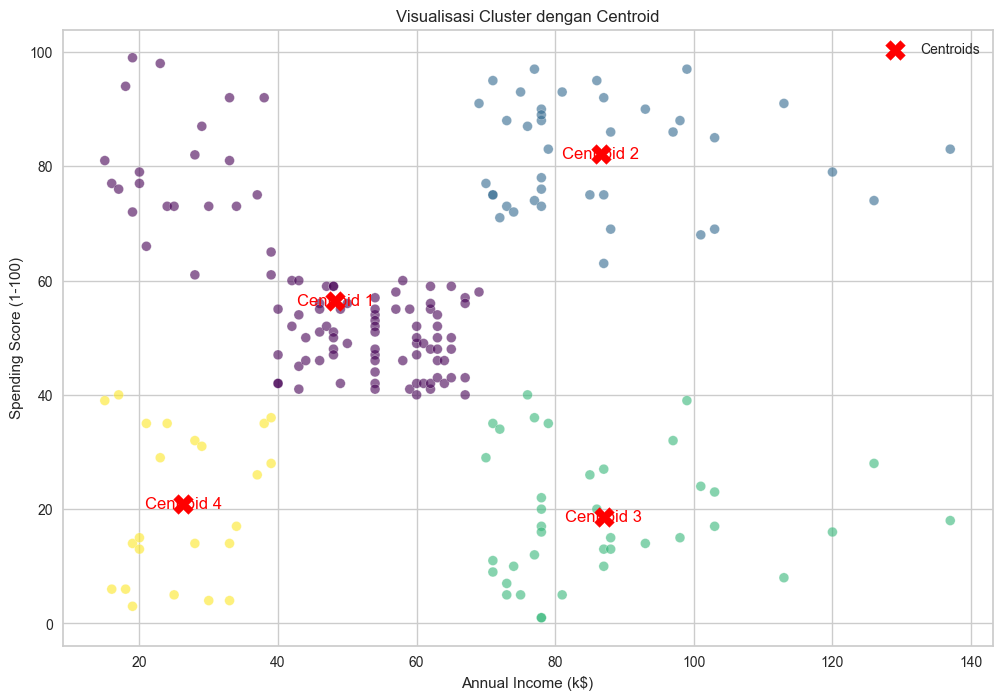

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [19]:
import matplotlib.pyplot as plt
 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")